**<span style="color:red">Namn och CID på gruppmedlemmar: </span>**

FYLL I HÄR


In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Uppgift 1 - 3D-bio

#### **(a)** Skriv en kort funktion $J_{proj}(𝛼)$, som ger Jones-matrisen som projicerar $E$-fältets komponenter på ett koordinatsystem vridet vinkeln $𝛼$


In [5]:
# Byt ut np.nan värdena så att det blir rätt!
def J_proj(alpha):
    return np.array([[np.cos(alpha), np.sin(alpha)],
                     [-np.sin(alpha), np.cos(alpha)]])


#### **(b)** Skriv de två korta funktionerna $J_{pol}(𝛼)$, som genererar Jones-matrisen för en roterad polarisator med transmissionsriktningen vinkeln $𝛼$ från $x$-axeln, samt $J_{ret}(𝛼,𝜑)$ som ger Jones-matrisen för en roterad ”retarder” med fasförskjutningen $𝜑$ radianer (en kvartsvågsplatta har alltså $𝜑=𝜋/2$) och eo-riktningen vinkeln $𝛼$ från $x$-axeln. Utnyttja funktionen $J_{proj}(𝛼)$.


In [6]:
def J_pol(alpha):
    return J_proj(-alpha)@np.array([[1, 0],[0, 0]])@J_proj(alpha)

def J_ret(alpha, phi): 
    return np.matmul(J_proj(-alpha), np.array([[np.exp(1j*phi), 0],[0, 1]]))@J_proj(alpha)

#### **(c)** Relatera $E^{ut}$ till $E^{in}$ för de fyra olika fallen. Beräkna även $I^{ut}$ och visa att inget ljus kommer fram i fall (ii) och (iii), medan hela $E^{in}$:s amplitud finns kvar vid observatörens öga i fall (i) och (iv).

In [7]:
# (i) R→R
E1_ut = J_pol(0)@J_ret(-np.pi/4,np.pi/2)@J_ret(np.pi/4,np.pi/2)@np.array([1,0])
I1_ut = np.linalg.norm(E1_ut)**2
print(I1_ut, E1_ut)

1.0000000000000009 [1.11022302e-16+1.j 0.00000000e+00+0.j]


In [8]:
# (ii) R→L
E2_ut = J_pol(0)@J_ret(np.pi/4,np.pi/2)@J_ret(np.pi/4,np.pi/2)@np.array([1,0])
I2_ut = np.linalg.norm(E2_ut)**2
print(I2_ut, E2_ut)


2.4651903288156624e-32 [-1.11022302e-16+1.11022302e-16j  0.00000000e+00+0.00000000e+00j]


In [9]:
# (iii) L→R
E3_ut = J_pol(0)@J_ret(-np.pi/4,np.pi/2)@J_ret(-np.pi/4,np.pi/2)@np.array([1,0])
I3_ut = np.linalg.norm(E3_ut)**2
print(I3_ut, E3_ut)


2.4651903288156624e-32 [-1.11022302e-16+1.11022302e-16j  0.00000000e+00+0.00000000e+00j]


In [10]:
# (iv) L→L
E4_ut = J_pol(0)@J_ret(-np.pi/4,np.pi/2)@J_ret(np.pi/4,np.pi/2)@np.array([1,0])
I4_ut = np.linalg.norm(E4_ut)**2
print(I4_ut, E4_ut)


1.0000000000000009 [1.11022302e-16+1.j 0.00000000e+00+0.j]


#### **(d)** Tyvärr är inte kvartsvåglängdsplattan våglängdsoberoende i verkligheten, utan fungerar bara perfekt för en våglängd i mitten av det synliga spektrumet. Antag att för en våglängd i kanten av det synliga området så avviker fasförskjutningen med $25$% (välj själv åt vilket håll) från den perfekta $𝜋/2$, för alla kvartsvågsplattorna. Hur mycket av den oönskade bilden – den som tidigare var svart – ser man nu?


In [11]:
# (i) R→R
# (i) R→R
E1_ut = J_pol(0)@J_ret(-np.pi/4,5*np.pi/8)@J_ret(np.pi/4,5*np.pi/8)@np.array([1,0])
I1_ut = np.linalg.norm(E1_ut)**2
print(I1_ut, E1_ut)

1.0000000000000004 [-0.38268343+0.92387953j  0.        +0.j        ]


In [12]:
# (ii) R→L
# (ii) R→L
E2_ut = J_pol(0)@J_ret(np.pi/4,5*np.pi/8)@J_ret(np.pi/4,5*np.pi/8)@np.array([1,0])
I2_ut = np.linalg.norm(E2_ut)**2
print(I2_ut, E2_ut)




0.14644660940672638 [0.14644661-0.35355339j 0.        +0.j        ]


In [13]:
# (iii) L→R
E3_ut = J_pol(0)@J_ret(-np.pi/4,5*np.pi/8)@J_ret(-np.pi/4,5*np.pi/8)@np.array([1,0])
I3_ut = np.linalg.norm(E3_ut)**2
print(I3_ut, E3_ut)



0.14644660940672638 [0.14644661-0.35355339j 0.        +0.j        ]


In [14]:
# (iv) L→L
E4_ut = J_pol(0)@J_ret(-np.pi/4,5*np.pi/8)@J_ret(np.pi/4,5*np.pi/8)@np.array([1,0])
I4_ut = np.linalg.norm(E4_ut)**2
print(I4_ut, E4_ut)



1.0000000000000004 [-0.38268343+0.92387953j  0.        +0.j        ]


#### **(e)** En spökbild, som den oönskade bilden i (d), är inte alls bra för 3D-upplevelsen. Som tur är finns det en mirakulöst enkel lösning på detta problem, som visas i figuren nedan: rotera glasen vid papperslapparna 90°! Visa att detta system inte ger någon spökbild alls, trots en felaktig fasförskjutning så hög som $25$%. Ett litet pris får man dock betala för detta, vilket?

In [15]:
# kod
# (i) R→R
Ein_roterad = np.array([0,1])

E1_ut = J_pol(0)@J_ret(np.pi/4,5*np.pi/8)@J_ret(np.pi/4,5*np.pi/8)@Ein_roterad
I1_ut = np.linalg.norm(E1_ut)**2
print("R till R:", I1_ut, E1_ut)

# (ii) R→L
E2_ut = J_pol(0)@J_ret(np.pi/4,5*np.pi/8)@J_ret(-np.pi/4,5*np.pi/8)@Ein_roterad
I2_ut = np.linalg.norm(E2_ut)**2
print(I2_ut, E2_ut)

# (iii) L→R
E3_ut = J_pol(0)@J_ret(-np.pi/4,5*np.pi/8)@J_ret(np.pi/4,5*np.pi/8)@Ein_roterad
I3_ut = np.linalg.norm(E3_ut)**2
print(I3_ut, E3_ut)

# (iv) L→L
E4_ut = J_pol(0)@J_ret(-np.pi/4,5*np.pi/8)@J_ret(-np.pi/4,5*np.pi/8)@Ein_roterad
I4_ut = np.linalg.norm(E4_ut)**2
print(I4_ut, E4_ut)

R till R: 0.8535533905932742 [-0.85355339-0.35355339j  0.        +0.j        ]
6.216093914885078e-35 [-7.8842209e-18+0.j  0.0000000e+00+0.j]
6.216093914885078e-35 [7.8842209e-18+0.j 0.0000000e+00+0.j]
0.8535533905932742 [0.85355339+0.35355339j 0.        +0.j        ]


# Uppgift 2 - Bildskärmen


#### **(a)** Skriv en funktion som genererar Jones-matrisen för den $n$-te roterade tunna skivan, $J_{ret2}(𝛼_n, 𝛿, n_{eo,\theta}, n_O, 𝜆)$ där $n_{eo,\theta} = n_{eo}(𝜃)$ för den aktuella tiltvinkeln och $𝜆$ är (vakuum-)våglängden för ljuset som passerat färgfiltret. Använd $𝐽_{proj}(𝛼)$ från föregående uppgift.

In [16]:
def J_ret2(alpha, delta, ne0, n0, lam):
    return J_proj(-alpha)@np.array([[np.exp(1j*delta*(ne0-n0)*2*np.pi/lam), 0],[0, 1]])@J_proj(alpha)

#### **(b)** Med hjälp av funktionen $J_{ret2}(𝛼_n, 𝛿, n_{eo,\theta}, n_O, 𝜆)$ samt $𝐽_{pol}(𝛼)$ från föregående uppgift, skriv kod som beräknar Jones-matrisen som relaterar $E^{ut}$ och $E^{in}$ enligt figuren i uppgiftsbeskrivningen.

Gör detta för ett antal olika värden på tiltvinkeln $𝜃$ och plotta intensiteten på det ljus som kommer utfrån pixeln (efter högra polarisatorn) som funktion av $𝜃$. I plotten, markera vilket värde på $𝜃$ som svarar mot $0$V spänning respektive hög spänning. Är det alltså möjligt att erhålla en kontinuerlig modulation av intensiteten mellan $0$ och $100$% för alla färger med denna LC skärm?

Text(0, 0.5, 'Intensitet [$W/m^2$]')

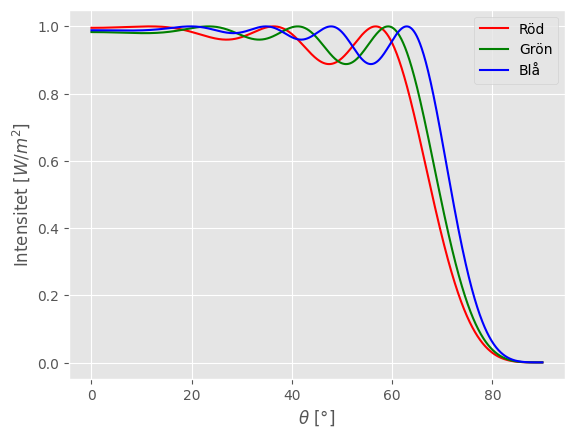

In [ ]:
n0 = 1.5
ne0 = 1.6
d = 20e-6
lam_r = 633e-9
lam_g = 549e-9
lam_b = 432e-9
N = 50

theta = np.arange(0, np.pi/2, 0.001)

def ne(theta, ne0, n0):
    return ne0*n0/(np.sqrt(n0**2*np.cos(theta)**2+ne0**2*np.sin(theta)**2))



def I_ut(theta, lam):
    E_in = np.array([1,0])
    for n in range(N):
        alpha_n = np.pi*n/(2*N)
        E_in = J_ret2(alpha_n, d/N, ne(theta, ne0, n0), n0, lam)@E_in
    
    E_ut = J_pol(alpha_n)@E_in
    return np.linalg.norm(E_ut)**2

I_ut_matris = []
for i in theta:
    I_ut_matris.append(I_ut(i, lam_r))

plt.plot(theta*180/np.pi, I_ut_matris, label="Röd", color="r")

I_ut_matris = []
for i in theta:
    I_ut_matris.append(I_ut(i, lam_g))

plt.plot(theta*180/np.pi, I_ut_matris, label="Grön", color="g")

I_ut_matris = []
for i in theta:
    I_ut_matris.append(I_ut(i, lam_b))

plt.plot(theta*180/np.pi, I_ut_matris, label="Blå", color="b")

plt.legend()
plt.xlabel(r'$\theta$ [°]')
plt.ylabel("Intensitet [$W/m^2$]")

#### **(c)** Hur ser alltså en ”död” pixel ut, d.v.s. en pixel som det, p.g.a. tillverkningsfel, inte går att lägga spänning över?

En "död" pixel har theta=0, vilket ger således att intensiteten för de olika färgerna på ljuset är alla 1 och den resulterande färgen blir vit.

#### **(d)** Hur tunt kan vätskekristallskiktet göras? Med andra ord, hur liten kan $𝑑$ vara under förutsättning att vi fortfarande vill kunna modulera utintensiteten mellan $0$ och $100$% genom att ändra tiltvinkeln mellan $0$ och $90°$. Att ha ett litet värde på $𝑑$ är viktigt eftersom detta ökar snabbheten i ändringen av tiltvinkel så att displayen kan visa snabba bildsekvenser.

Text(0, 0.5, 'Intensitet [$W/m^2$]')

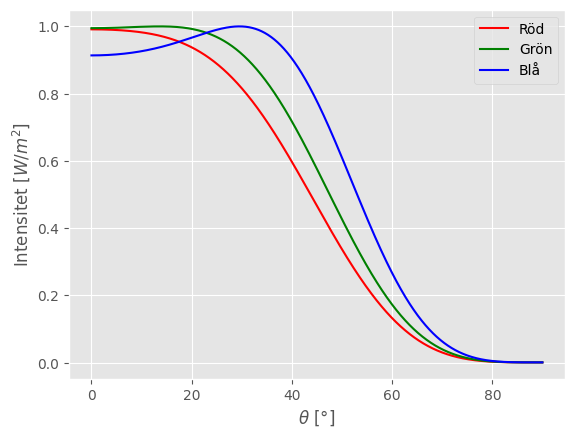

In [43]:
d=5.2e-6

def I_ut(theta, lam):
    E_in = np.array([1,0])
    for n in range(N):
        alpha_n = np.pi*n/(2*N)
        E_in = J_ret2(alpha_n, d/N, ne(theta, ne0, n0), n0, lam)@E_in
    
    E_ut = J_pol(alpha_n)@E_in
    return np.linalg.norm(E_ut)**2

I_ut_matris = []
for i in theta:
    I_ut_matris.append(I_ut(i, lam_r))

plt.plot(theta*180/np.pi, I_ut_matris, label="Röd", color="r")

I_ut_matris = []
for i in theta:
    I_ut_matris.append(I_ut(i, lam_g))

plt.plot(theta*180/np.pi, I_ut_matris, label="Grön", color="g")

I_ut_matris = []
for i in theta:
    I_ut_matris.append(I_ut(i, lam_b))

plt.plot(theta*180/np.pi, I_ut_matris, label="Blå", color="b")

plt.legend()
plt.xlabel(r'$\theta$ [°]')
plt.ylabel("Intensitet [$W/m^2$]")

5.2 är gränsen